In [53]:
import pandas as pd
import numpy as np
import os
import sys
import soundfile
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
Ravdess = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\RAVDESS\\audio_speech_actors_01-24"
Crema = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\CREMA\\AudioWAV"
Tess = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\TESS\\TESSTorontoemotionalspeechsetdata\\TESSTorontoemotionalspeechsetdata1"
Savee = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\SAVEE\\AudioData\\AudioData1"

In [46]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor_path = os.path.join(Ravdess, dir)
    actor = os.listdir(actor_path)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '\\' + dir + '\\' + file)

emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])

path_df = pd.DataFrame(file_path, columns = ['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis = 1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.Emotions.value_counts()

neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: Emotions, dtype: int64

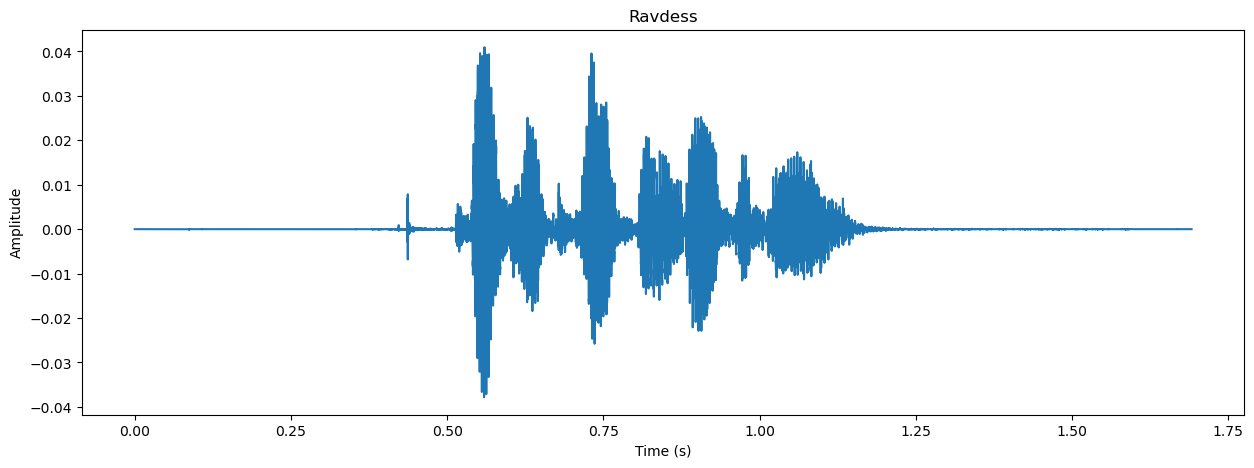

In [142]:
fname = 'C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\RAVDESS\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav'
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))
time = librosa.times_like(data, sr=sampling_rate)
plt.plot(time/1000, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Ravdess')
plt.show()

Audio(fname)

In [47]:
crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []
for file in crema_directory_list:
    file_path.append(Crema + "\\" + file)
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
path_df = pd.DataFrame(file_path, columns = ['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis = 1)
Crema_df.Emotions.value_counts()

angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64

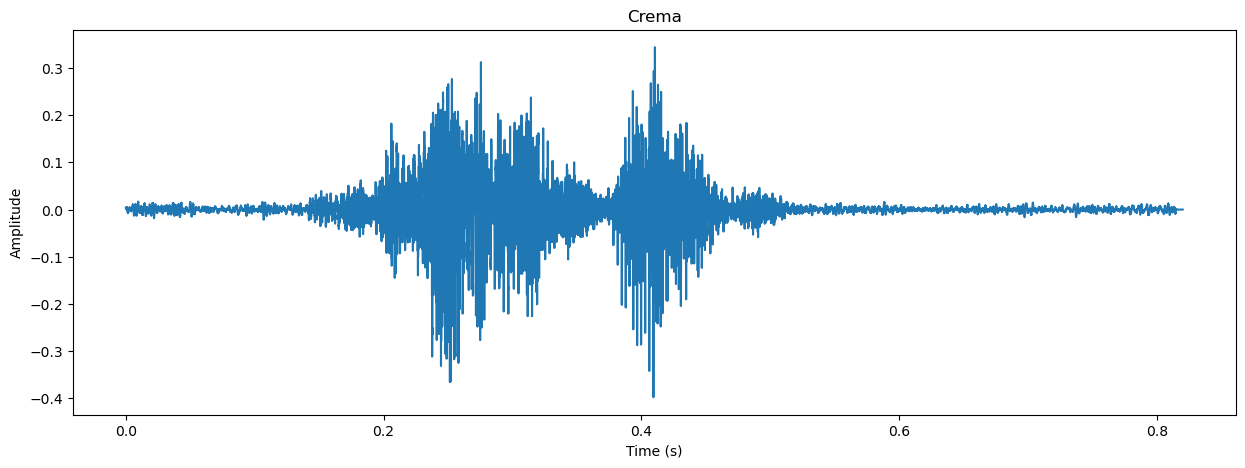

In [141]:
fname = Crema + '\\1001_IEO_FEA_MD.wav'
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))
time = librosa.times_like(data, sr=sampling_rate)
plt.plot(time/1000, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Crema')
plt.show()

Audio(fname)

In [98]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []
for dir in tess_directory_list:
    if dir.lower() == 'desktop.ini':
        continue
    
    directories_path = os.path.join(Tess, dir)
    directories = os.listdir(directories_path)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '\\' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
path_df = pd.DataFrame(file_path, columns = ['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis = 1)
Tess_df.Emotions.value_counts()

angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotions, dtype: int64

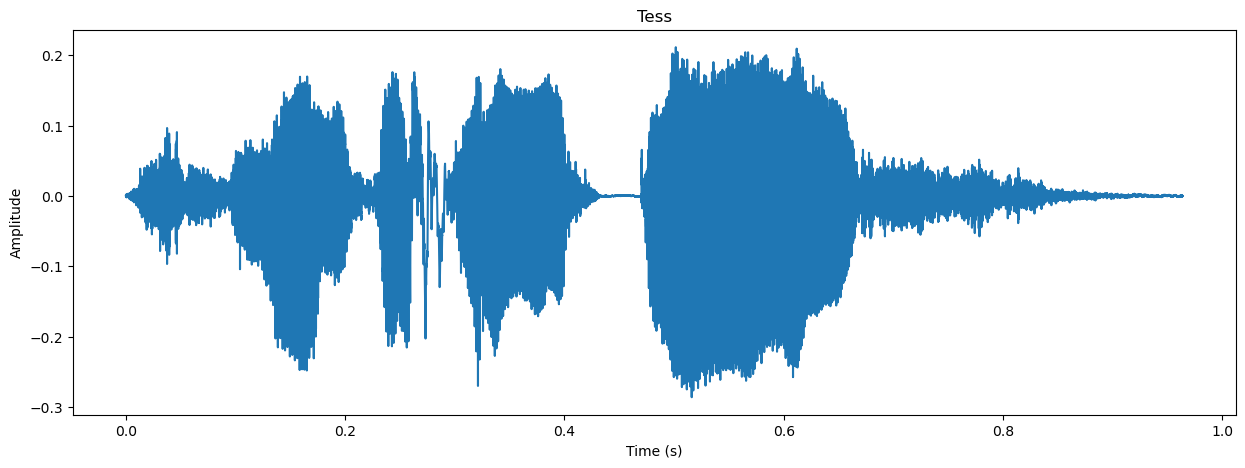

In [140]:
fname = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\TESS\\TESSTorontoemotionalspeechsetdata\\TESSTorontoemotionalspeechsetdata1\\YAF_fear\\YAF_base_fear.wav"
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))
time = librosa.times_like(data, sr=sampling_rate)
plt.plot(time/1000, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Tess')
plt.show()

Audio(fname)

In [129]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for dir in savee_directory_list:
    actor_path = os.path.join(Savee, dir)
    actor = os.listdir(actor_path)
    for file in actor:
        part = file.split('_')
        ele = part[0][:-6]
        if ele=='a':
            file_emotion.append('angry')
        elif ele=='d':
            file_emotion.append('disgust')
        elif ele=='f':
            file_emotion.append('fear')
        elif ele=='h':
            file_emotion.append('happy')
        elif ele=='n':
            file_emotion.append('neutral')
        elif ele=='sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')
        
        # Wypełniamy kolumnę file_path odpowiednią ścieżką do pliku
        file_path.append(os.path.join(actor_path, file))

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

Emotions                                               Path
0       angry  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
1       angry  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
2       angry  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
3       angry  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
4       angry  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
..        ...                                                ...
475  surprise  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
476  surprise  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
477  surprise  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
478  surprise  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...
479  surprise  C:\Users\Patryk\Desktop\ML_BADAWCZY\SAVEE\Audi...

[480 rows x 2 columns]

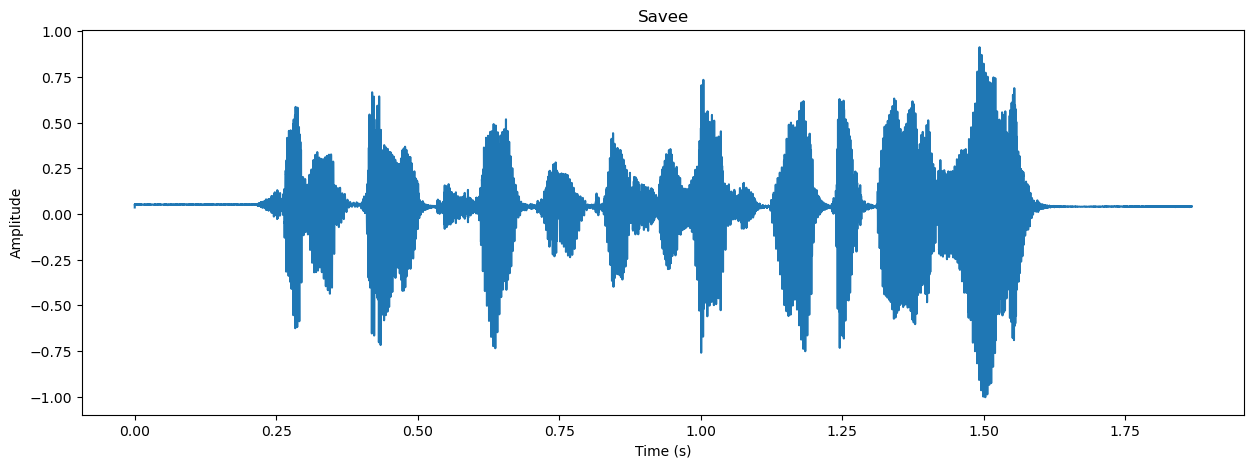

In [131]:
fname = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\SAVEE\\AudioData\\DC\\a01.wav"
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))
time = librosa.times_like(data, sr=sampling_rate)
plt.plot(time/1000, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Savee')
plt.show()

Audio(fname)

In [132]:
data_path = pd.concat([Ravdess_df, Tess_df, Savee_df, Crema_df], axis = 0)
data_path.to_csv("data_path.csv",index = False)
data_path.head()
data_path.Emotions.value_counts()

happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: Emotions, dtype: int64

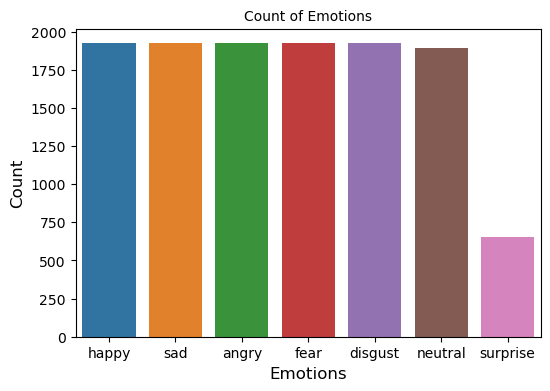

In [138]:
plt.figure(figsize = (6, 4))
sns.barplot(x=data_path.Emotions.value_counts().index, y=data_path.Emotions.value_counts())
plt.title('Count of Emotions', size = 10)
plt.ylabel('Count', size = 12)
plt.xlabel('Emotions', size = 12)
plt.show()

In [167]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {}'.format(e), size=15)
    time = librosa.times_like(data, sr=sr)
    plt.plot(time/1000, data)
    plt.show()
    
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

def create_mfcc(data, sr, e):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

In [182]:
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [184]:
fname = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\SAVEE\\AudioData\\DC\\a01.wav"
data, sampling_rate = librosa.load(fname, duration=2.5, offset=0.6)
print("ZCR: ", zcr(data).shape)
print("RMS :", rmse(data).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)

ZCR:  (108,)
RMS : (108,)
MFCC:  (2160,)


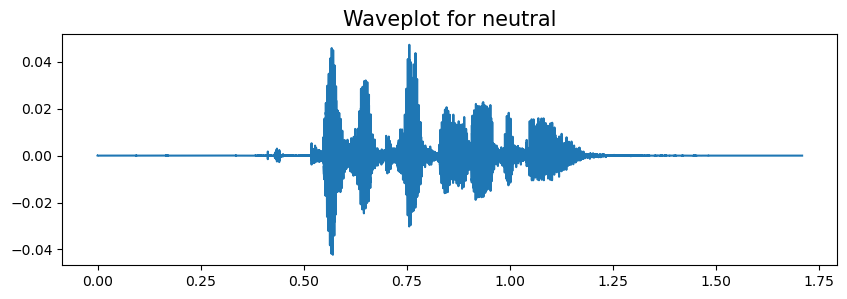

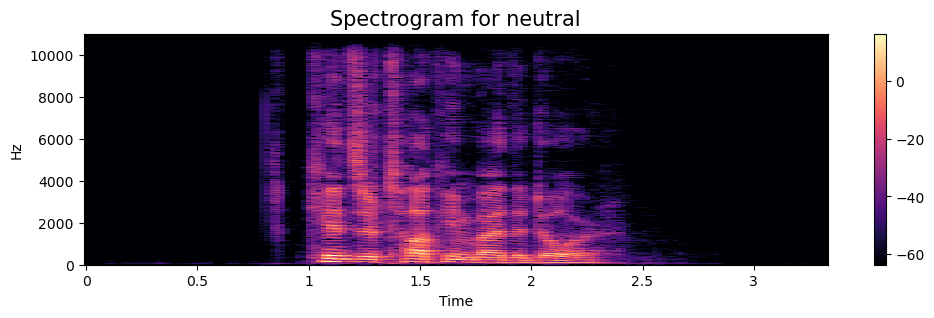

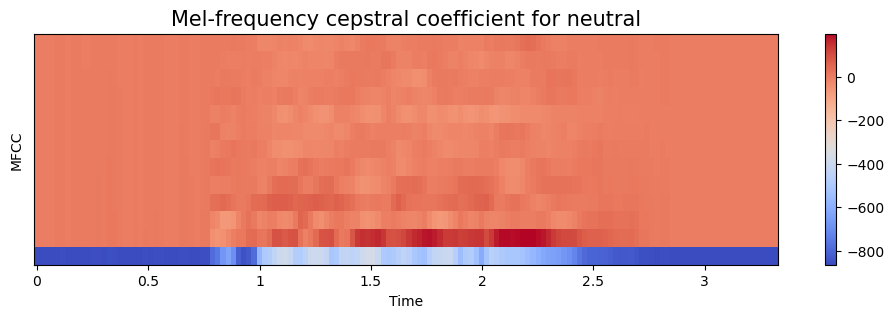

In [174]:
emotion = 'neutral'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)
Audio(path)

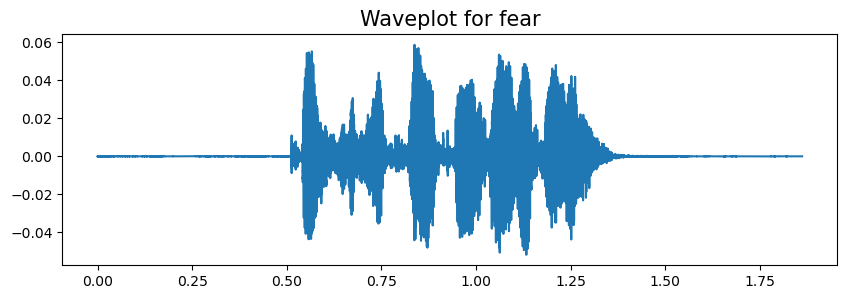

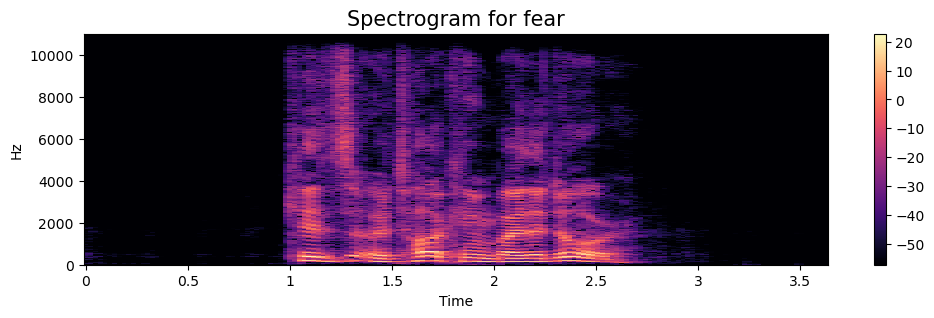

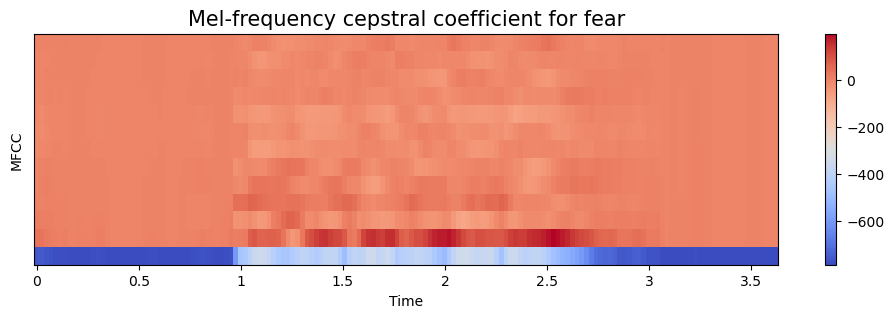

In [175]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

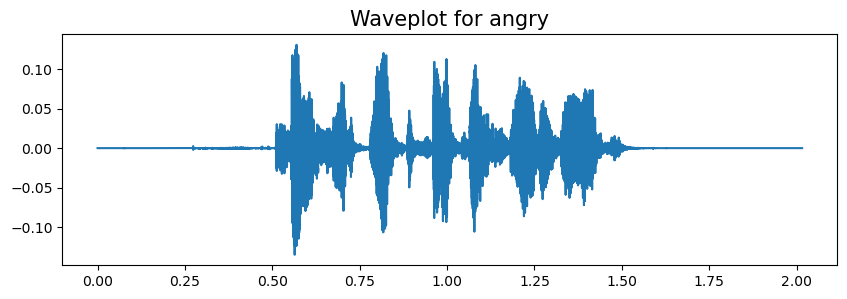

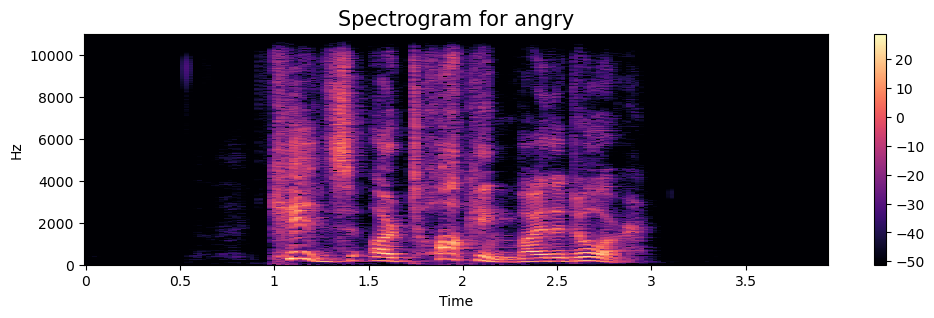

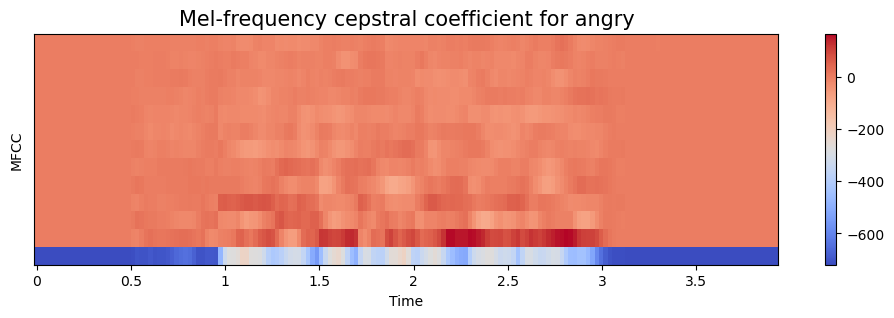

In [176]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

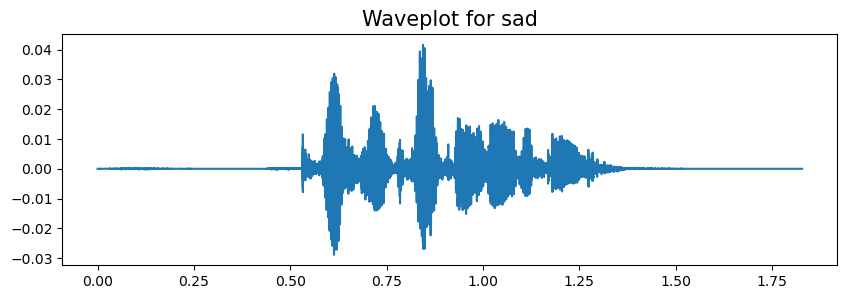

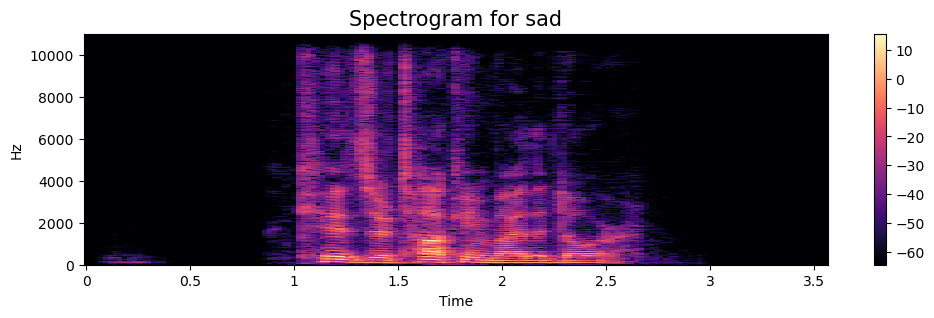

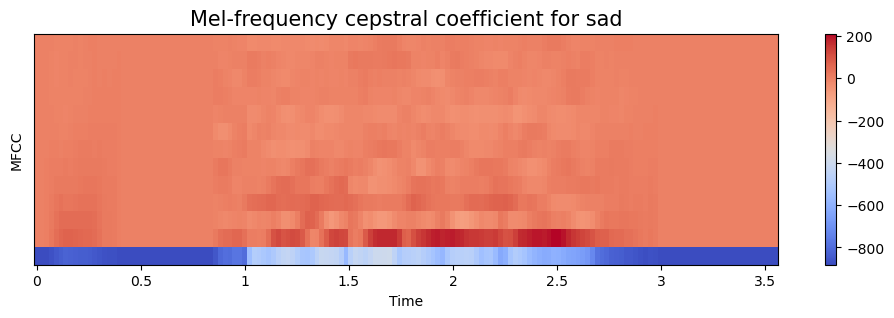

In [178]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

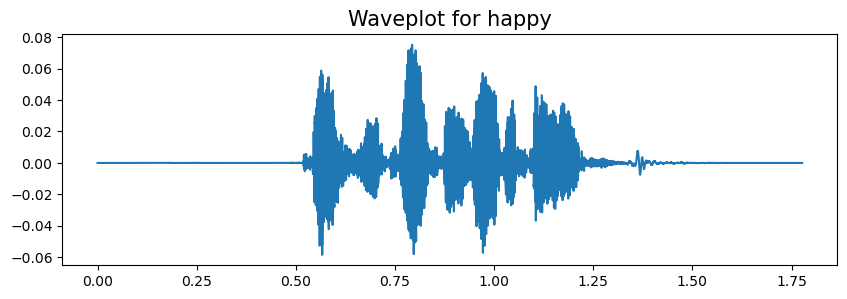

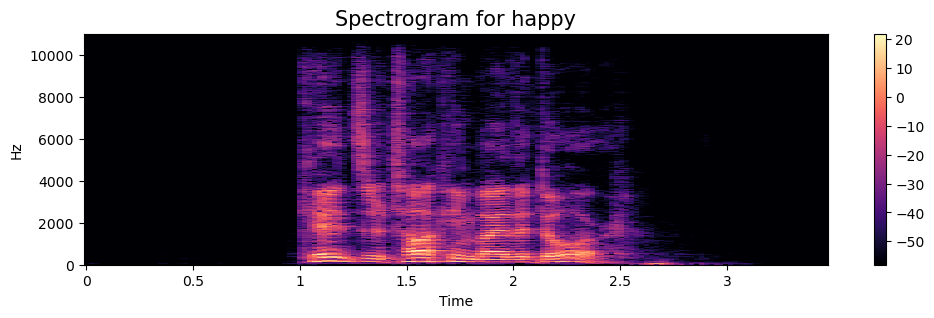

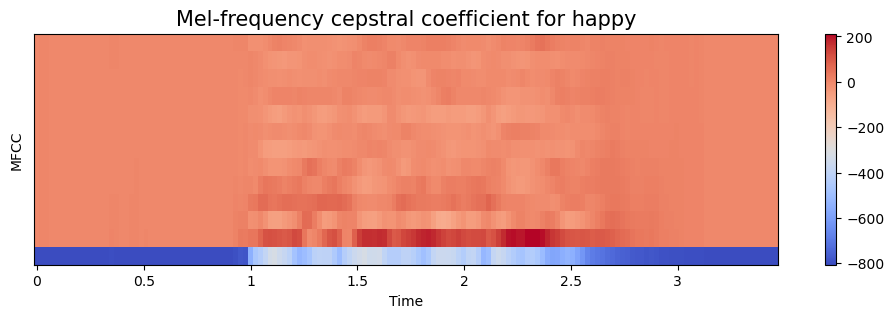

In [179]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

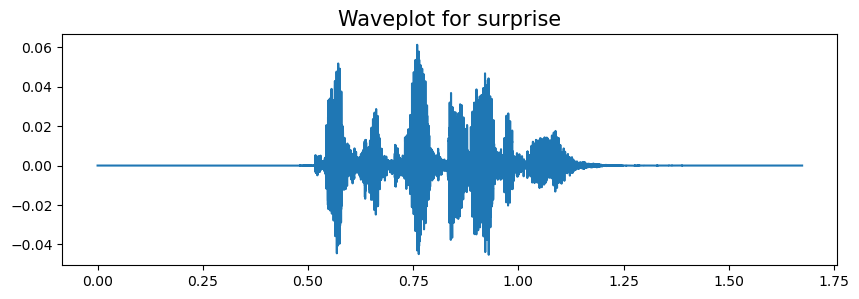

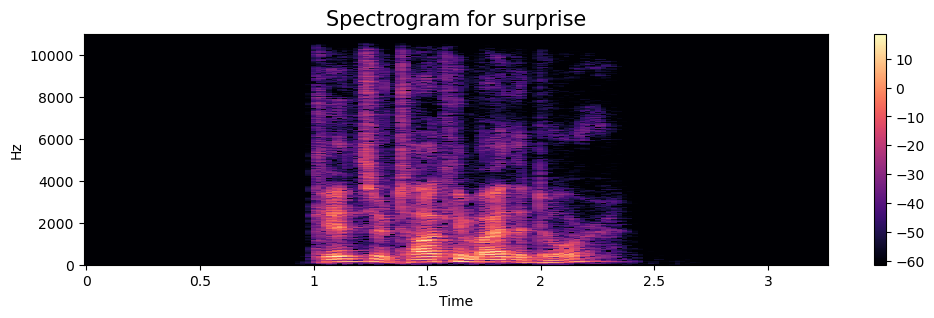

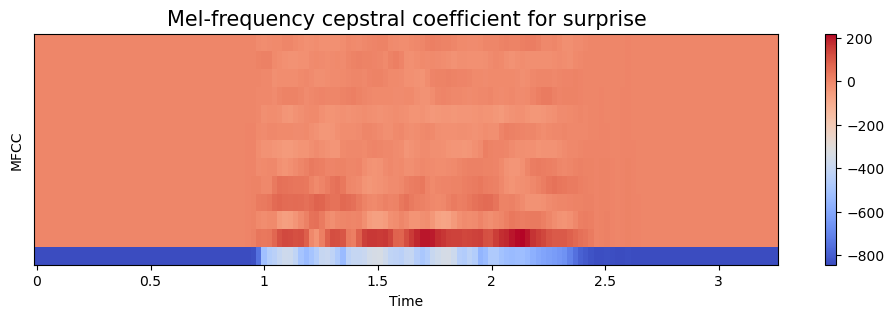

In [180]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

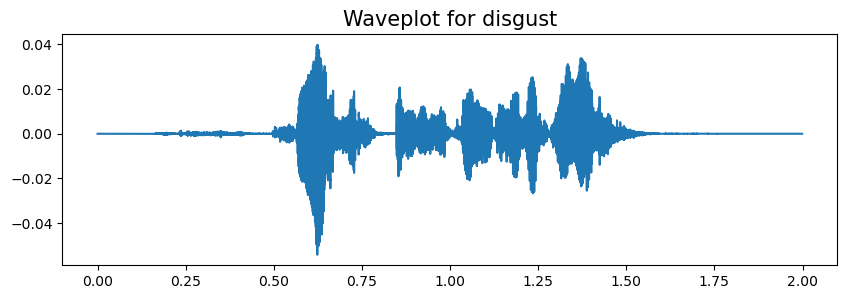

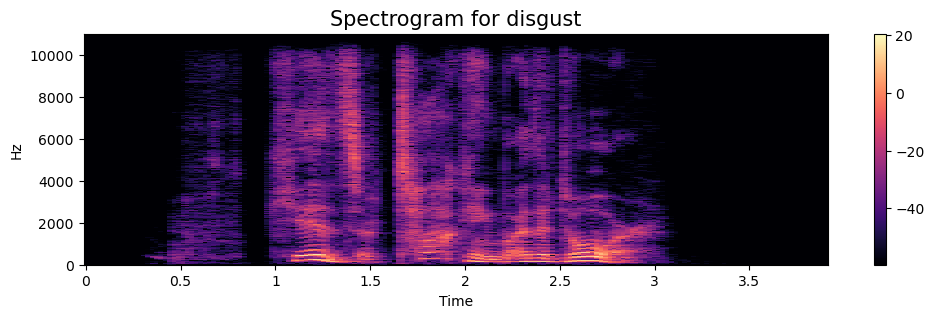

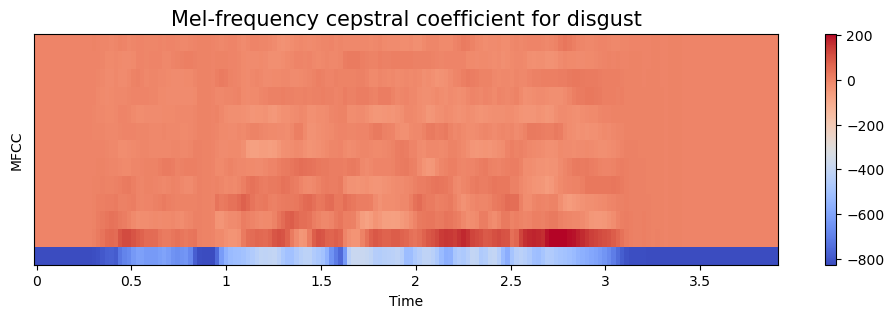

In [181]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

In [185]:
def noise(data,noise_rate=0.015):
    noise_amp = noise_rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

path = np.array(data_path.Path)[2]
data, sample_rate = librosa.load(path)

<Figure size 1400x400 with 0 Axes>

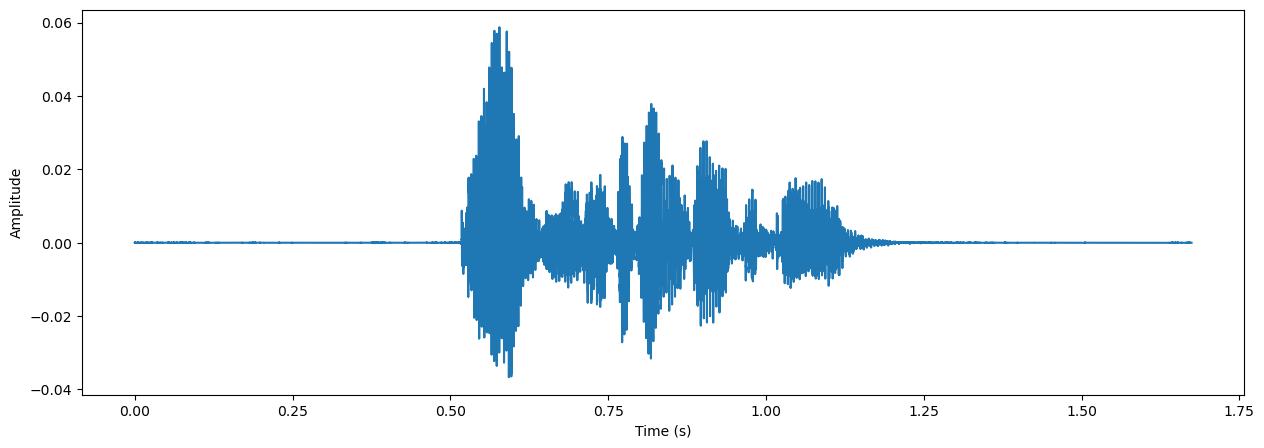

In [187]:
plt.figure(figsize=(14,4))
time = librosa.times_like(data, sr=sampling_rate)
plt.plot(time/1000, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
Audio(path)

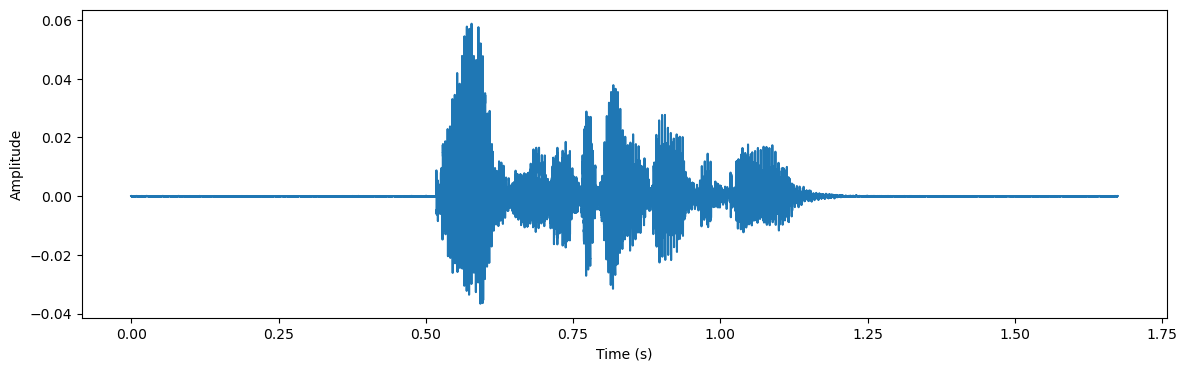

In [193]:
plt.figure(figsize=(14,4))
x = noise(data)
time = librosa.times_like(x, sr=sampling_rate)
plt.plot(time/1000, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
Audio(x, rate=sample_rate)

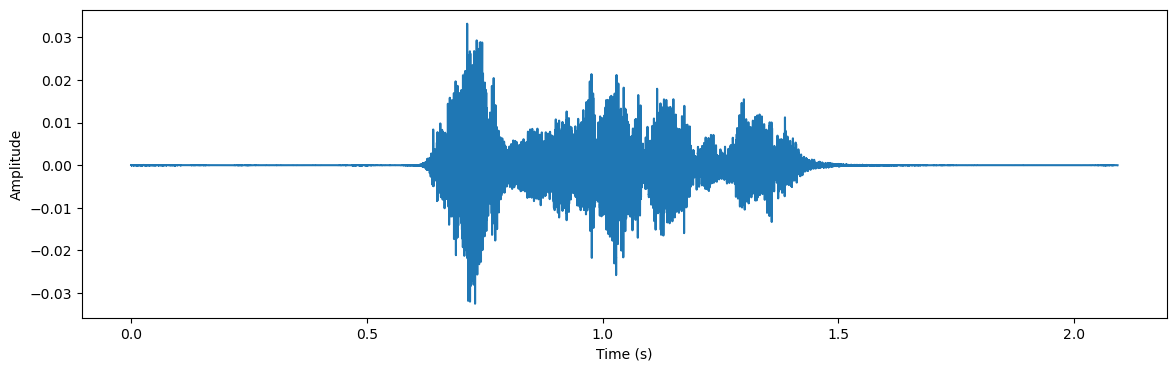

In [194]:
plt.figure(figsize=(14,4))
x = stretch(data)
time = librosa.times_like(x, sr=sampling_rate)
plt.plot(time/1000, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
Audio(x, rate=sample_rate)

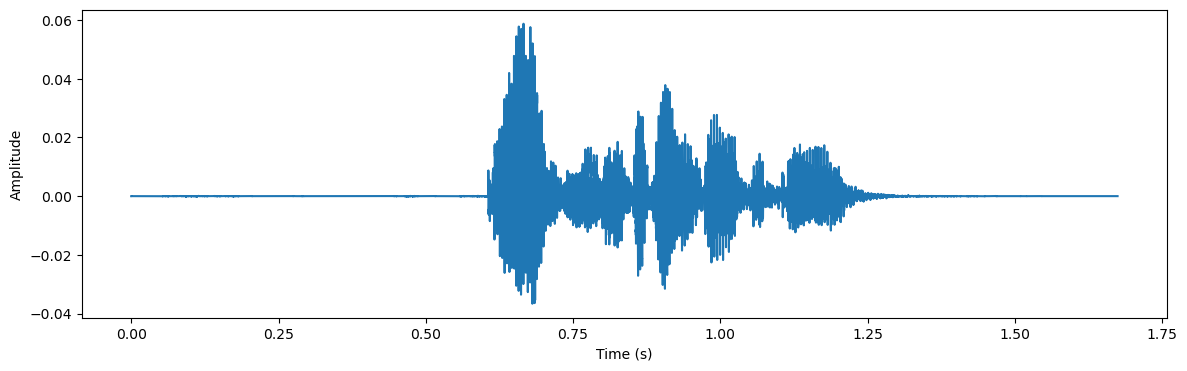

In [195]:
plt.figure(figsize=(14,4))
x = shift(data)
time = librosa.times_like(x, sr=sampling_rate)
plt.plot(time/1000, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
Audio(x, rate=sample_rate)

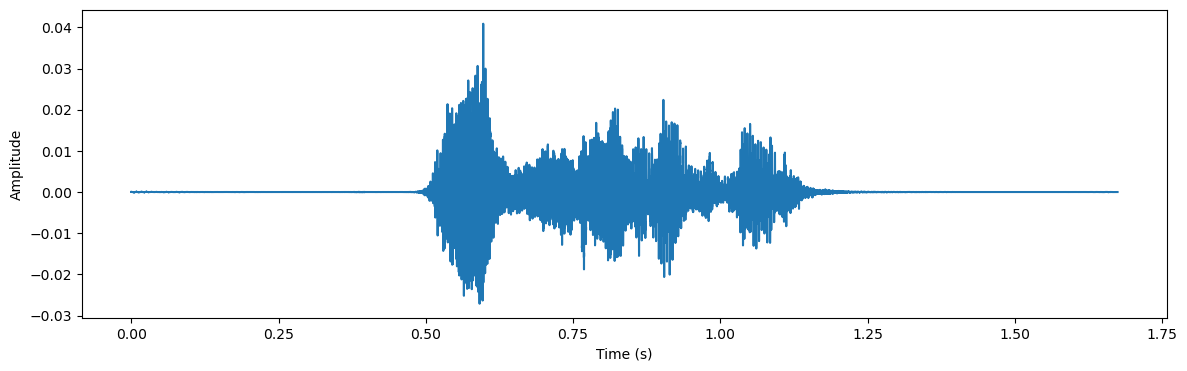

In [197]:
plt.figure(figsize=(14,4))
x = pitch(data, sample_rate)
time = librosa.times_like(x, sr=sampling_rate)
plt.plot(time/1000, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
Audio(x, rate=sample_rate)